## GTI770 - Systèmes Intelligents et Apprentissage Machine

#### Alessandro L. Koerich

### Notebook Jupyter - 6_Bayes - Weather Nominal Dataset

##### Created: May 2018
##### Revised: Jan 2019

In [1]:
# Imports
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

### Nominal features - Scikit-learn will fail...

In [2]:
# Load data from file
num_features = 4
data         = np.loadtxt("CSV_Files/weather.nominal.arff.csv", delimiter="," , skiprows=1)
# This will give you and error, because the features are NOMINAL!
# Therefore, we need to preprocess the data to convert it to NUMERICAL features.
# Give a look at the "3 - préparation de données et extraction de primitives" slides to see how
# to do it.

ValueError: could not convert string to float: 'sunny'

### Features discretized with One Hot Encoding - Scikit-learn will work...

In [3]:
# Load data from file (converted from nominal to numerical (binary approach))
num_features = 8
data = np.loadtxt( "CSV_Files/weather.nominal_binary.arff.csv", delimiter=",", skiprows = 1 )
# We need to skip the first line of the file, since it is just the column names (header)
# outlook=sunny,outlook=overcast,outlook=rainy,temperature=hot,temperature=mild,temperature=cool,humidity=normal,windy=weak,play

### The discretized features are:
#### outlook=sunny, outlook=overcast, outlook=rainy, temperature=hot, temperature=mild, temperature=cool, humidity=normal, windy=weak, play

In [4]:
data

array([[1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0.]])

In [5]:
# Define the training set
X_train  = data[:,0:num_features]
Y_train  = data[:,num_features] # last column = class labels

In [6]:
X_train
# 8 columns = inputs = features converted to binary

array([[1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0.]])

In [7]:
Y_train
# last column = output = class labels

array([0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.])

### Scikit-Learn Naïve Bayes Documentation

* http://scikit-learn.org/stable/modules/naive_bayes.html

* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

### Decide on the Probability Distribution

Now that we have our data ready to train your model, we need first to choose the appropriate probability distribution to model/represent the data.
 
Which probability distributions should we use?

#### 1. Bernoulli distribution: discrete features, 2 possible states (binary features). Ex: Wind {Strong, Weak}
#### 2. Multinomial dsitribution: discrete features, 3 or more possible states (n-ary features). Ex: Outlook {Sunny, Rain, Overcast}   
#### 3. Normal distribution: real-value features. Ex: Temperature [-50, +50]   



If you choose:

#### 1. BernoulliNB:
implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.
        
#### 2. MultinomialNB:
implements the naive Bayes algorithm for multinomially distributed data, where the data are typically represented as counts.
        
#### 3. GaussianNB:
implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.
        

In [8]:
# Train the Decision Tree with the training set
model = BernoulliNB()
model = model.fit(X_train, Y_train)

In [9]:
# Show all parameters of the model BernoulliNB
# You can change all these parameters
# See the documentation
model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [10]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Y_train_pred = model.predict( X_train )
Y_train_pred

array([0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.])

In [11]:
# You can also predict the probability of each class
# train dataset
Y_train_pred_prob = model.predict_proba(X_train)
Y_train_pred_prob

array([[0.80060325, 0.19939675],
       [0.90355524, 0.09644476],
       [0.1842401 , 0.8157599 ],
       [0.40010771, 0.59989229],
       [0.10600278, 0.89399722],
       [0.2167106 , 0.7832894 ],
       [0.04045337, 0.95954663],
       [0.64372329, 0.35627671],
       [0.24311814, 0.75688186],
       [0.13228291, 0.86771709],
       [0.49073921, 0.50926079],
       [0.19168629, 0.80831371],
       [0.04908894, 0.95091106],
       [0.60880253, 0.39119747]])

In [13]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
acc_weather_binary_train = accuracy_score(Y_train, Y_train_pred )
print("Correct classification rate for train dataset = "+str(acc_weather_binary_train*100)+"%")

Correct classification rate for train dataset = 92.85714285714286%


In [15]:
from sklearn.metrics import classification_report

In [16]:
target_names = ['Dont Play', 'Play']
print( classification_report(Y_train, Y_train_pred, target_names=target_names))
# This works, but we have labels with no predicted samples

              precision    recall  f1-score   support

   Dont Play       1.00      0.80      0.89         5
        Play       0.90      1.00      0.95         9

   micro avg       0.93      0.93      0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



In [17]:
cm_weather_binary_train = confusion_matrix(Y_train, Y_train_pred )
cm_weather_binary_train

array([[4, 1],
       [0, 9]])

In [18]:
import itertools
import matplotlib.pyplot as plt

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
np.set_printoptions(precision = 2)

In [21]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_weather_binary_train, classes= ['Dont Play', 'Play'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[4 1]
 [0 9]]


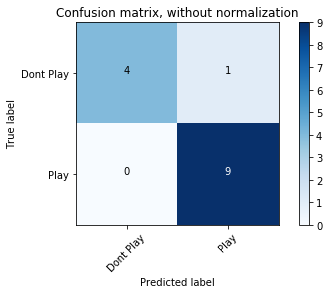

In [22]:
plt.show()

In [23]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_weather_binary_train, classes= ['Dont Play', 'Play'],
                      normalize=True,
                      title='Confusion matrix, with normalization')

Normalized confusion matrix
[[0.8 0.2]
 [0.  1. ]]


In [ ]:
plt.show()

In [ ]:
print("Notebook ended")